# 一、决策树模型

# 1.模型搭建

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
df = pd.read_excel('客户信息及违约表现.xlsx')
# 1.提取特征变量和目标变量
X = df.drop(columns='是否违约')
y = df['是否违约']

# 2.划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 3.模型训练及搭建
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
print(clf)  # 这里可以将训练好的模型打印出来看看



d:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
d:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='la

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


d:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


# 2.模型预测

In [2]:
# # 一、模型搭建
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
df = pd.read_excel('客户信息及违约表现.xlsx')
# 1.提取特征变量和目标变量
X = df.drop(columns='是否违约')
y = df['是否违约']

# 2.划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 3.模型训练及搭建
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)

# # 二、模型预测及评估
# 1.直接预测是否违约
y_pred = clf.predict(X_test)
print(y_pred)

# 将预测值和实际值汇总看一下
a = pd.DataFrame()  # 创建一个空DataFrame
a['预测值'] = list(y_pred)
a['实际值'] = list(y_test)
print(a.tail())

# 查看模型预测准确度
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

# 2.预测不违约&违约概率
y_pred_proba = clf.predict_proba(X_test)
print(y_pred_proba)  # 打印看看预测的不违约&违约概率，此时获得y_pred_proba是个二维数组，共两列，左列为不违约概率，右列为违约概率

# 只查看违约概率,其中中括号中第一个元素：冒号表示全部行，第二个元素：1表示第二列，如果把
print(y_pred_proba[:, 1])

# 3.模型预测效果评估
# ROC曲线相关知识
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test.values, y_pred_proba[:, 1])

# 将阈值tpr、假警报率fpr、命中率tpr汇总看一下
a = pd.DataFrame()  # 创建一个空DataFrame
a['阈值'] = list(thres)
a['假警报率'] = list(fpr)
a['命中率'] = list(tpr)
print(a)

# 绘制ROC曲线，注意图片展示完要将其关闭才会执行下面的程序
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

# 求出AUC值
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test.values, y_pred_proba[:, 1])
print(score)

d:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0
 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1]
     预测值  实际值
195    0    0
196    0    0
197    0    0
198    1    0
199    1    1
[[0.86004515 0.13995485]
 [0.86004515 0.13995485]
 [0.86004515 0.13995485]
 [0.86004515 0.13995485]
 [0.55782313 0.44217687]
 [0.86004515 0.13995485]
 [0.86004515 0.13995485]
 [0.86004515 0.13995485]
 [0.55782313 0.44217687]
 [0.04065041 0.95934959]
 [0.86004515 0.13995485]
 [0.04065041 0.95934959]
 [0.86004515 0.13995485]
 [0.55782313 0.44217687]
 [0.86004515 0.13995485]
 [0.04065041 0.95934959]
 [0.         1.        ]
 [0.04065041 0.95934959]
 [0.86004515 0.13995485]
 [0.86004515 0.13995485]
 [0.86004

<Figure size 640x480 with 1 Axes>

0.8464714714714715


# 3.模型可视化呈现

In [2]:
# # 一、模型搭建
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
df = pd.read_excel('客户信息及违约表现.xlsx')
# 1.提取特征变量和目标变量
X = df.drop(columns='是否违约')
y = df['是否违约']

# 2.划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 3.模型训练及搭建
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)

# # 二、模型可视化呈现（供感兴趣的读者参考，其中绘图插件graphviz的安装及使用见如下网址：https://shimo.im/docs/lUYMJX0TEjoncFZk /）
# 1.如果不用显示中文，那么通过如下代码即可：
from sklearn.tree import export_graphviz
import graphviz
import os  # 以下这两行是手动进行环境变量配置，防止在本机环境的变量部署失败
os.environ['PATH'] = os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'
dot_data = export_graphviz(clf, out_file=None, class_names=['0', '1'])
# print(dot_data)
graph = graphviz.Source(dot_data)
# print(graph)
graph.render("result")
print('可视化文件result.pdf已经保存在代码所在文件夹！')

# 2.如果想显示中文，需要使用如下代码
from sklearn.tree import export_graphviz
dot_data = export_graphviz(clf, out_file=None, feature_names=X_train.columns, class_names=['不违约', '违约'], rounded=True, filled=True)
import os  # 以下这两行是手动进行环境变量配置，防止在本机环境的变量部署失败
os.environ['PATH'] = os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'

with open('dot_data.txt', 'w') as f:
    f.writelines(dot_data)
import codecs
import re
txt_dir = r'dot_data.txt'
txt_dir_utf8 = r'dot_data_utf8.txt'
with codecs.open(txt_dir, 'r') as f, codecs.open(txt_dir_utf8, 'w', encoding='utf-8') as wf:
    for line in f:
        if 'fontname' in line:
            font_re = 'fontname=(.*?)]'
            old_font = re.findall(font_re, line)[0]
            line = line.replace(old_font, 'SimHei')
        newline = line
        wf.write(newline + '\t')
wf.close()
os.system('dot -Tpng dot_data_utf8.txt -o example.png')  # 以PNG的图片形式存储生成的可视化文件
print('可视化文件example.png已经保存在代码所在文件夹！')

os.system('dot -Tpdf dot_data_utf8.txt -o example.pdf')  # 以PDF的形式存储生成的可视化文件
print('可视化文件example.pdf已经保存在代码所在文件夹！')

可视化文件result.pdf已经保存在代码所在文件夹！
可视化文件example.png已经保存在代码所在文件夹！
可视化文件example.pdf已经保存在代码所在文件夹！


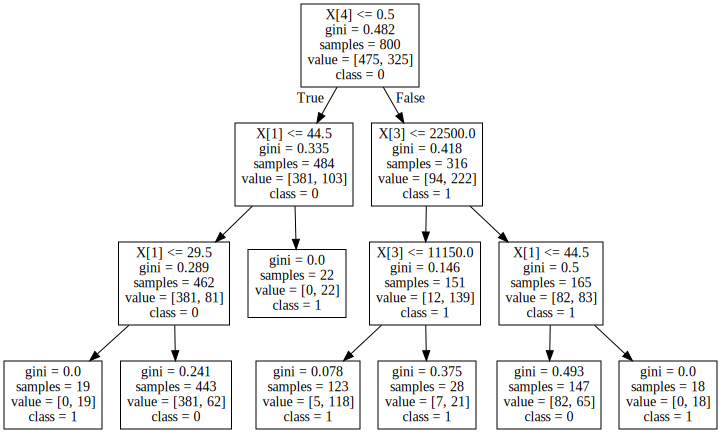

In [3]:
graph

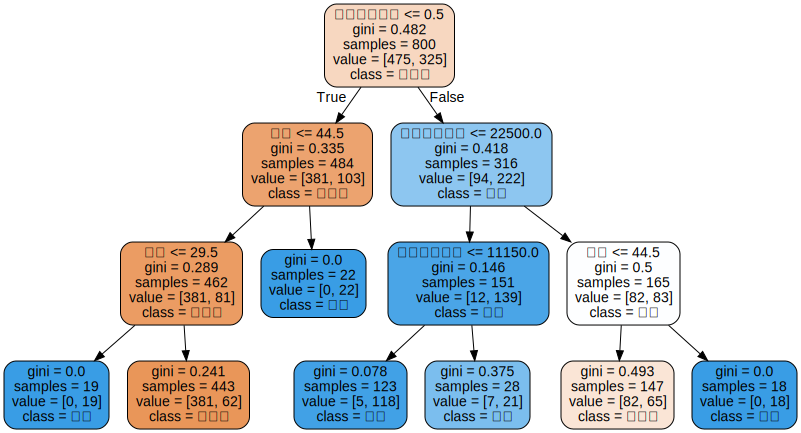

In [4]:
from sklearn.tree import export_graphviz
import graphviz
import os  # 以下这两行是手动进行环境变量配置，防止在本机环境的变量部署失败
os.environ['PATH'] = os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'
dot_data = export_graphviz(clf, out_file=None, feature_names=X_train.columns, class_names=['不违约', '违约'], rounded=True, filled=True)
# print(dot_data)
graph = graphviz.Source(dot_data)
graph